In [1]:
from PIL import Image
import numpy as np
import matplotlib.cm as cm

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import threshold_isodata
from skimage.filters import threshold_minimum
from skimage.filters import threshold_otsu
from skimage.morphology import square

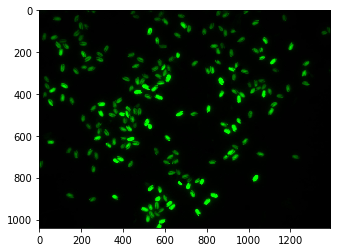

In [3]:
test_image = io.imread('14251.5_3(2).jpg')
plt.imshow(test_image)

## Change to grayscale according to green channel

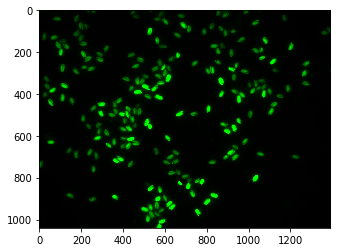

In [5]:
green_image = test_image.copy()
green_image[:,:,0] = 0
green_image[:,:,2] = 0
plt.imshow(green_image)

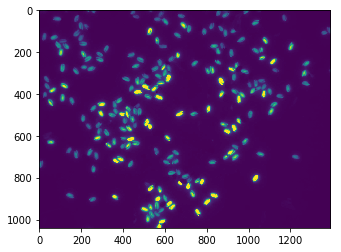

In [6]:
gray_image = rgb2gray(green_image)
plt.imshow(gray_image)

## Set threshold to get binary images (for all fluorescent seeds and bright seeds)

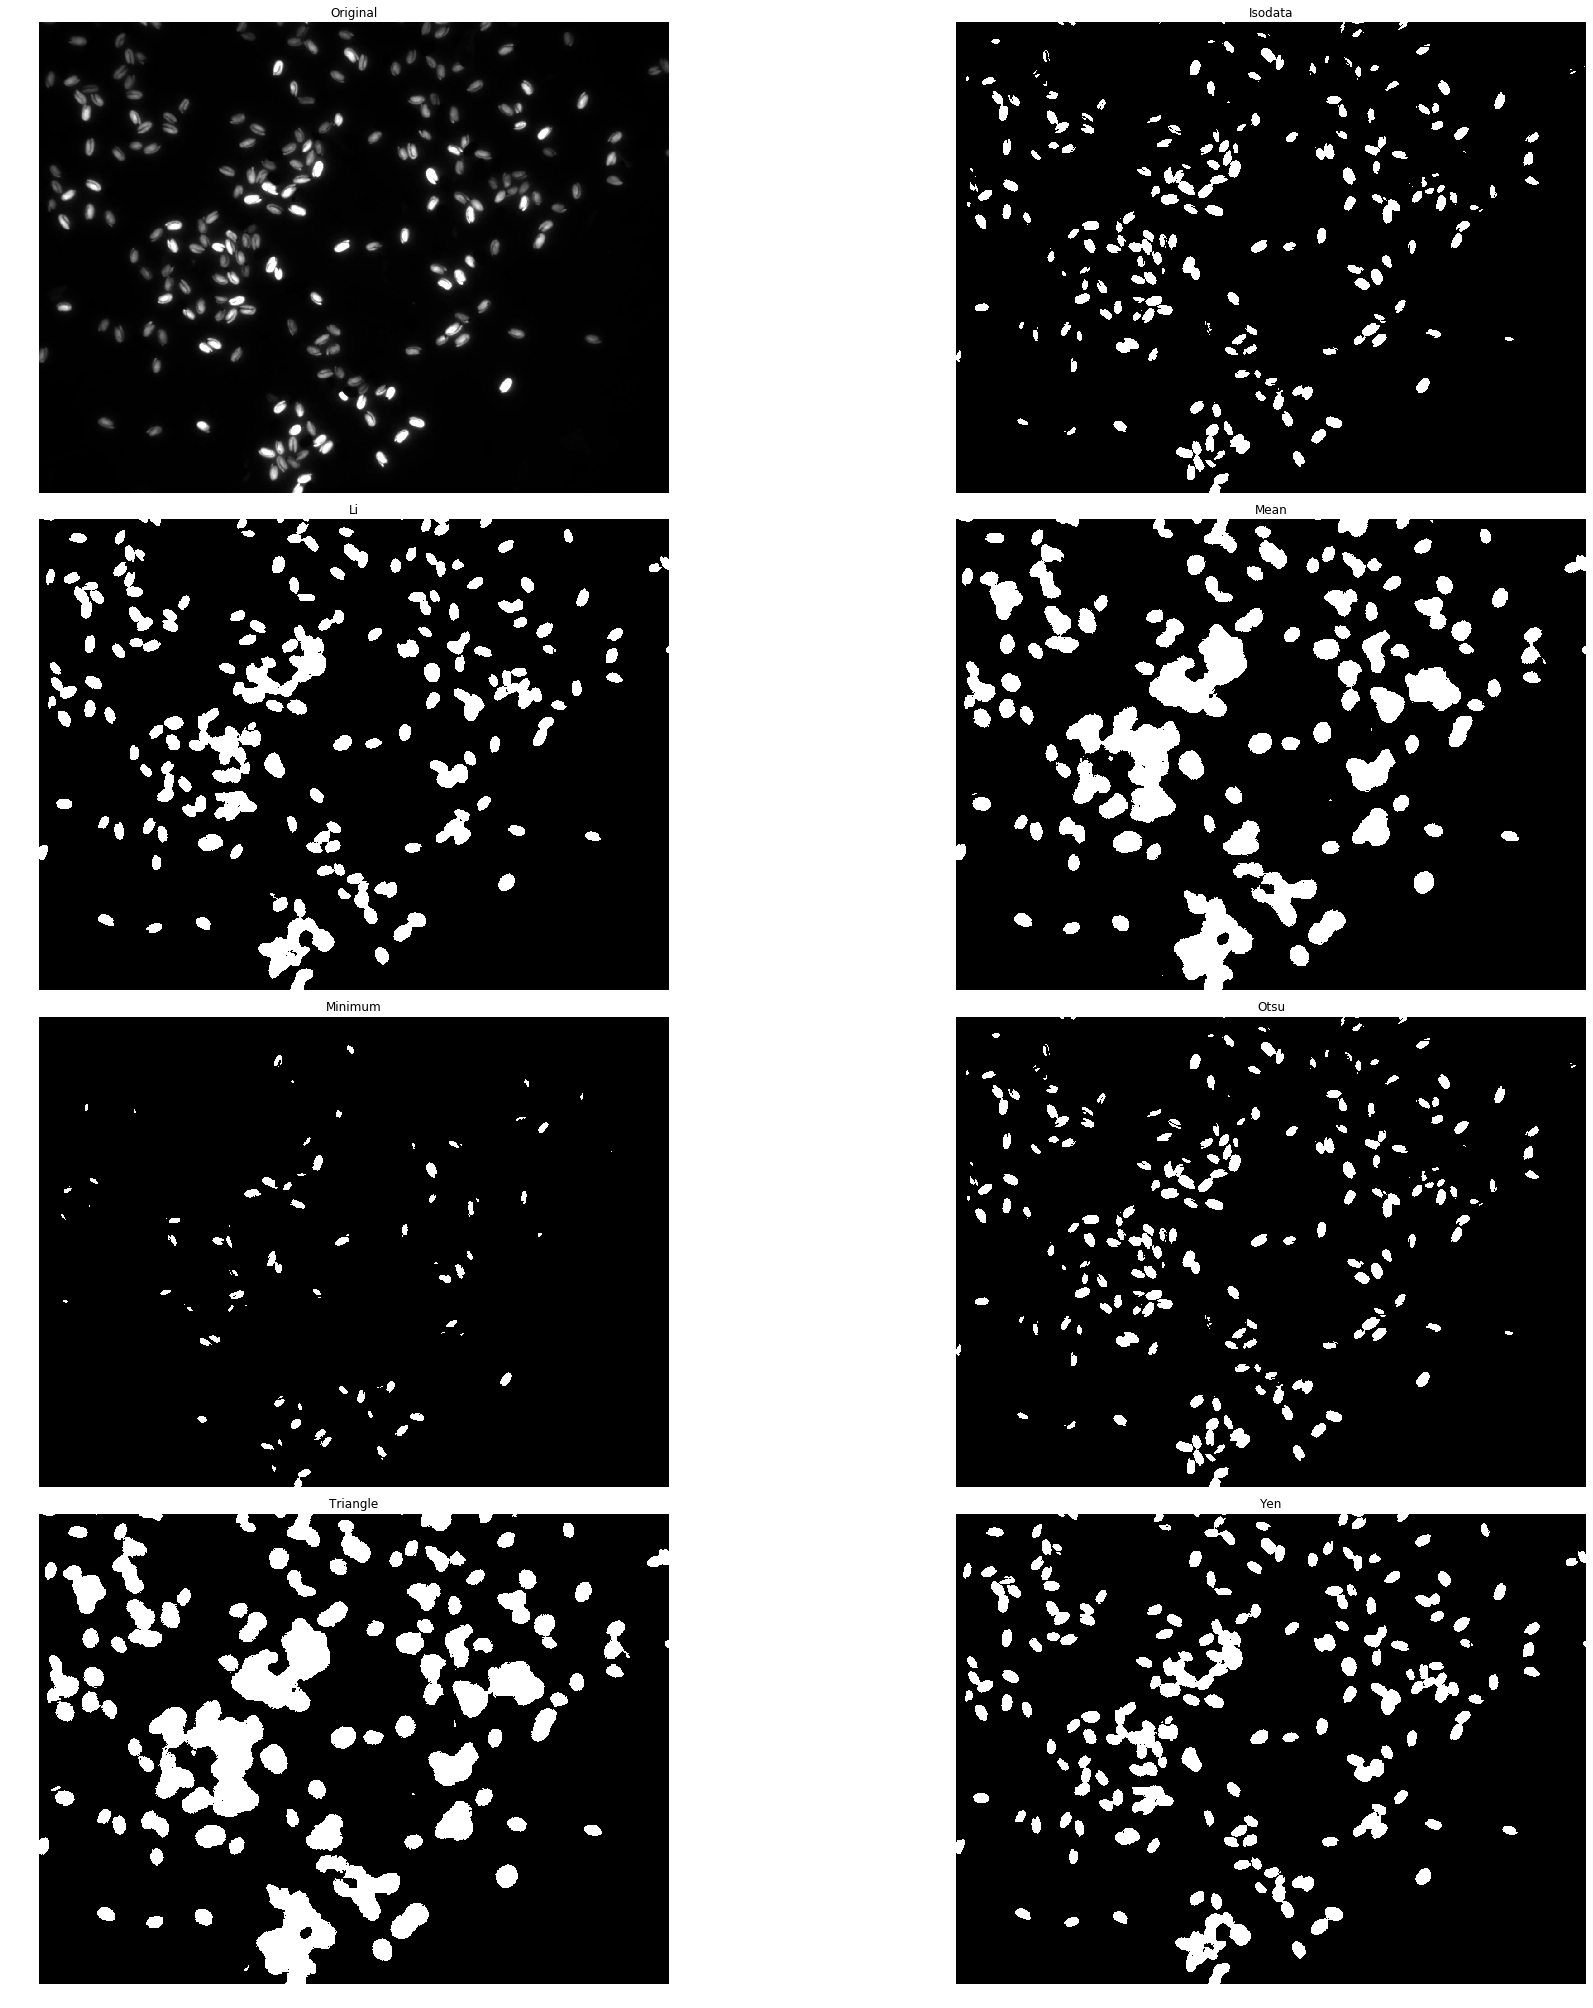

In [7]:
#try all different thresholding methods
fig, ax = try_all_threshold(gray_image, figsize=(30, 28), verbose=False)
plt.show()

In [8]:
iso = threshold_isodata(gray_image)
otsu = threshold_otsu(gray_image)
iso

0.21378164062500002

In [9]:
otsu

0.216576171875

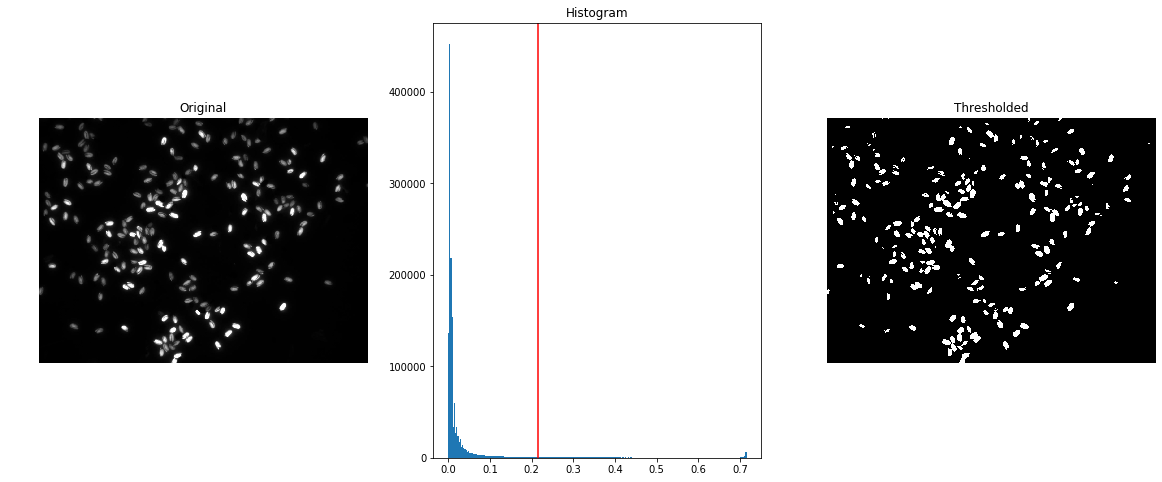

In [10]:
#use 'otsu' methods for Fluorescent seeds
#show histogram and compare the images before/after thresholding

thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(20, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(gray_image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()


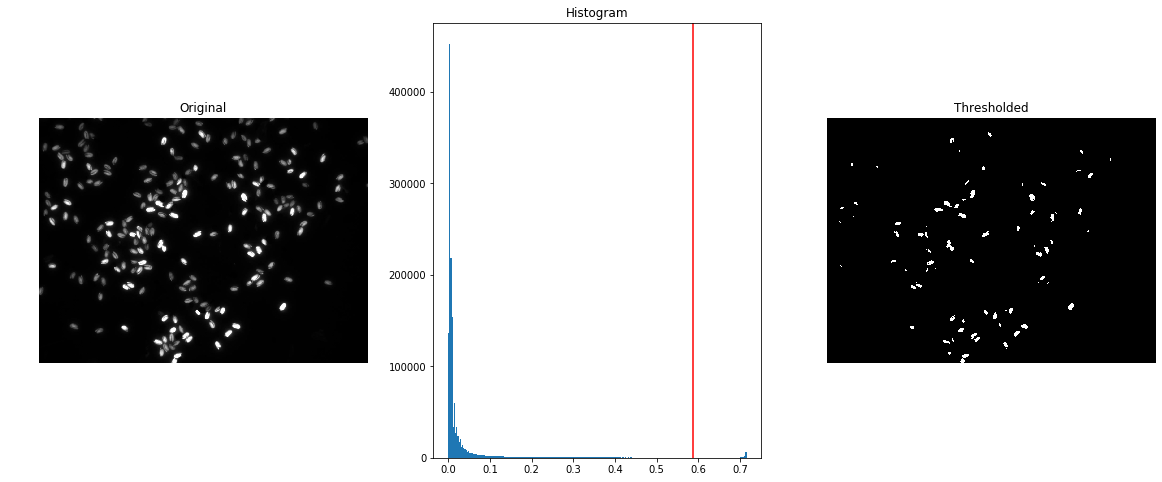

In [11]:
#use 'minimum' methods for the bright fluorescent seeds
#show histogram and compare the images before/after thresholding

thresh_Bright = threshold_minimum(gray_image)
binary_Bright = gray_image > thresh_Bright

fig, axes = plt.subplots(ncols=3, figsize=(20, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(gray_image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh_Bright, color='r')

ax[2].imshow(binary_Bright, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()


## Label regions

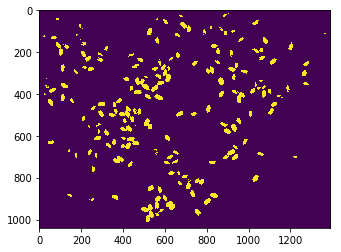

In [12]:
bw = closing(binary, square(3)) 
cleared = clear_border(bw) #ignore all the seeds at the edge of the image

plt.imshow(cleared)

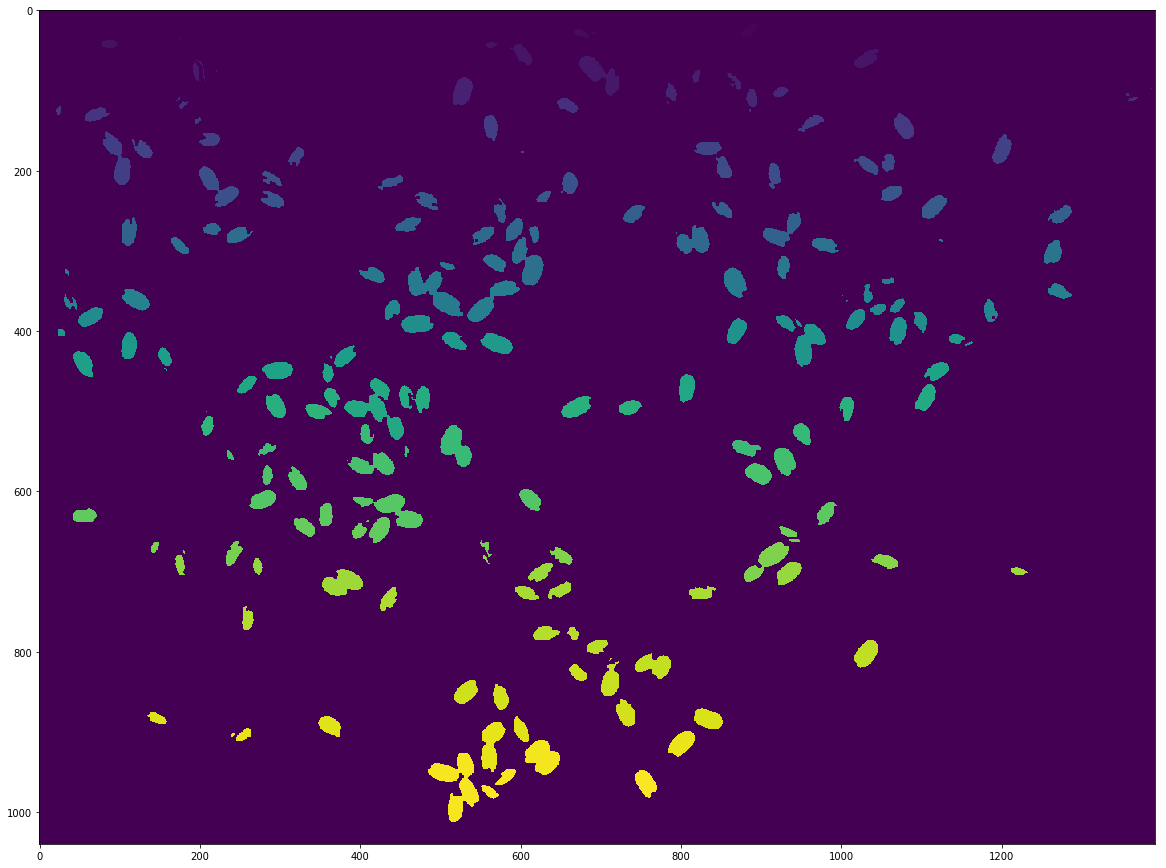

In [13]:
label_image = label(cleared)
plt.figure(figsize=(20,20))
plt.imshow(label_image)

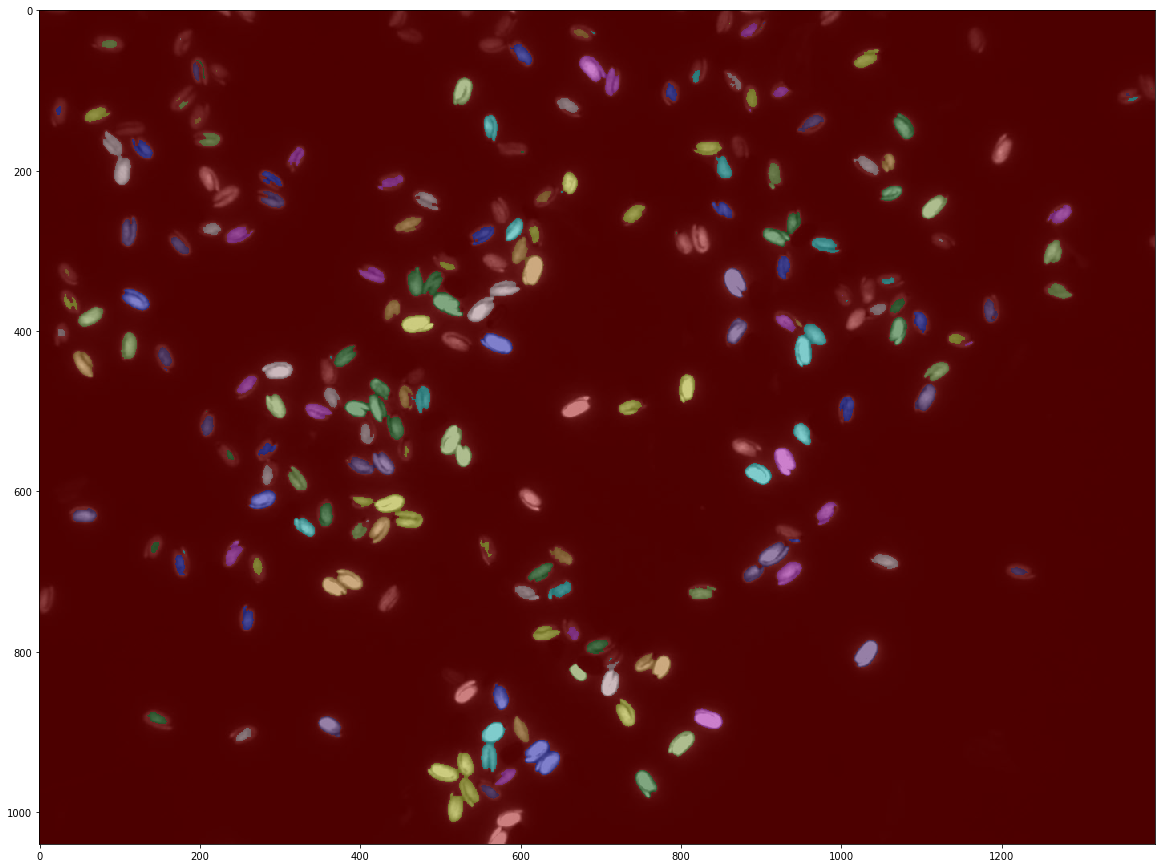

In [14]:
image_label_overlay = label2rgb(label_image, image=test_image)
plt.figure(figsize=(20,20))
plt.imshow(image_label_overlay)


In [15]:
seed = 0
cali_seed = 0
cali_area = 0
large_area = 0

for region in regionprops(label_image):
    if 400 < region.area < 700 :
        cali_seed = cali_seed + 1
        cali_area = cali_area + region.area
    if 5 < region.area < 700:
        #print('label ' + str(region.label) + ' area ' + str(region.area))
        seed = seed + 1
    elif region.area > 700:
        large_area = large_area + region.area

ave_area = cali_area / cali_seed
large_seed = large_area / ave_area
seed = seed + large_seed

print('average area of seeds is: ' + str(ave_area))
print('There are ' + str(int(large_seed)) + ' large seeds')
print('Total seeds: ' + str(int(seed)))


average area of seeds is: 512.7543859649123
There are 52 large seeds
Total seeds: 213


## Drafts

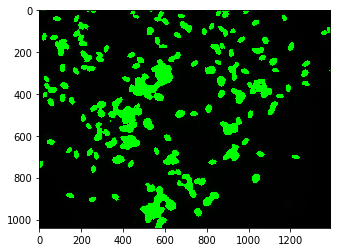

In [16]:
green = test_image[:,:,1]>20
test_image[green] = [0,255,0]
plt.imshow(test_image)

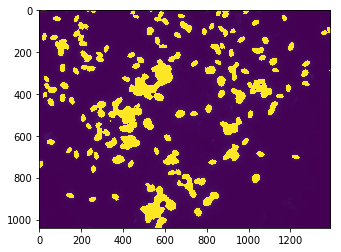

In [17]:
gray_test = rgb2gray(test_image)
plt.imshow(gray_test)

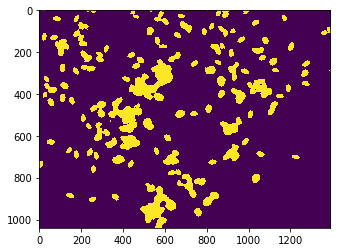

In [18]:
thresh_test = threshold_otsu(gray_test)
binary_test = gray_test > thresh_test

label_test = label(binary_test)
plt.imshow(binary_test)

In [19]:
seed = 0
cali_seed = 0
cali_area = 0
large_area = 0

for region in regionprops(label_test):
    
    if 5 < region.area < 700:
        #print('label ' + str(region.label) + ' area ' + str(region.area))
        seed = seed + 1
    elif region.area > 700:
        large_area = large_area + region.area

large_seed = large_area / 512
seed = seed + large_seed

print('average area of seeds is: ' + str(ave_area))
print('There are ' + str(int(large_seed)) + ' large seeds')
print('Total seeds: ' + str(int(seed)))


average area of seeds is: 512.7543859649123
There are 325 large seeds
Total seeds: 359


In [20]:
cali_array = np.array(cali_image)
cali_array.shape

NameError: name 'cali_image' is not defined

In [ ]:
pylab.imshow(cali_array[...,1])
pylab.colorbar(orientation = 'horizontal')
pylab.show()

In [ ]:
grain_size = np.sum(cali_array[...,1]>5) /500
grain_size

In [ ]:
cali_array[1000,0]